<a href="https://colab.research.google.com/github/virg1n/ISSAI/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22group_2_ethnicity%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
gender_test_counter = []
race_test_counter = []
age_test_counter = []

gender = []
race = []
age = [] #            0: 0-3	 1: 4-19		2: 20-39		3: 40-69		4: 70+

In [ ]:
def getInfo():
    for i in range(1, 3069):
        if i < 10:
            file = open(f'./manual/test_000{i}_manu_attri.txt', 'r')
        elif i < 100:
            file = open(f'./manual/test_00{i}_manu_attri.txt', 'r')
        elif i < 1000:
            file = open(f'./manual/test_0{i}_manu_attri.txt', 'r')
        else:
            file = open(f'./manual/test_{i}_manu_attri.txt', 'r')

        content = file.readlines()
        
        gender.append(content[5])
        race.append(content[6])
        age.append(content[7])


        gender_test_counter.append(content[5])
        race_test_counter.append(content[6])
        age_test_counter.append(content[7])
    test_gender = np.array([Counter(gender_test_counter)['0\n'], Counter(gender_test_counter)['1\n'], Counter(gender_test_counter)['2\n']])
    test_race = np.array([Counter(race_test_counter)['0\n'], Counter(race_test_counter)['1\n'], Counter(race_test_counter)['2\n']])
    test_age = np.array([Counter(age_test_counter)['0\n'], Counter(age_test_counter)['1\n'], Counter(age_test_counter)['2\n']+1, Counter(age_test_counter)['3\n']+1, Counter(age_test_counter)['4\n']])

    for i in range(1, 12272):
        if i < 10:
            file = open(f'./manual/train_0000{i}_manu_attri.txt', 'r')
        elif i < 100:
            file = open(f'./manual/train_000{i}_manu_attri.txt', 'r')
        elif i < 1000:
            file = open(f'./manual/train_00{i}_manu_attri.txt', 'r')
        elif i < 10000:
            file = open(f'./manual/train_0{i}_manu_attri.txt', 'r')
        else:
            file = open(f'./manual/train_{i}_manu_attri.txt', 'r')
        content = file.readlines()
        gender.append(content[5])
        race.append(content[6])
        age.append(content[7])
        
    total_gender = np.array([Counter(gender)['0\n'], Counter(gender)['1\n'], Counter(gender)['2\n']])
    total_race = np.array([Counter(race)['0\n'], Counter(race)['1\n'], Counter(race)['2\n']])
    total_age = np.array([Counter(age)['0\n'], Counter(age)['1\n'], Counter(age)['2\n']+1, Counter(age)['3\n']+1, Counter(age)['4\n']])
    return (total_gender, total_race, total_age, test_gender, test_race, test_age)

In [ ]:
# I calculated it on local machine

test_gender = np.array([1249, 1620, 199])
test_race = np.array([2351, 234, 483])
test_age = np.array([329, 486, 1662, 502, 89])


total_gender = np.array([6206, 8182, 951])
total_race = np.array([11742, 1202, 2395])
total_age = np.array([1612, 2656, 8193, 2422, 455])

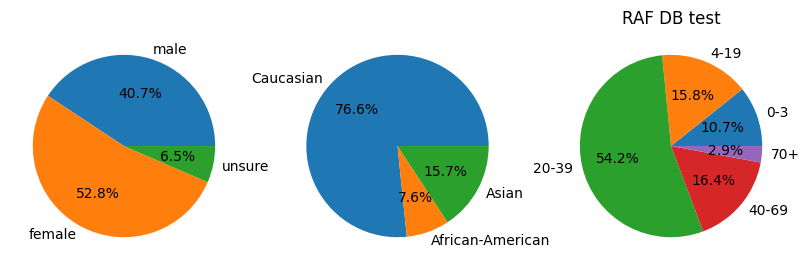

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].pie(test_gender, labels=["male", "female", "unsure"],autopct='%1.1f%%')
axs[1].pie(test_race, labels=["Caucasian", "African-American", "Asian"], autopct='%1.1f%%')
axs[2].pie(test_age, labels=["0-3", "4-19", "20-39", "40-69", "70+"], autopct='%1.1f%%')
plt.title("RAF DB test")
plt.show()

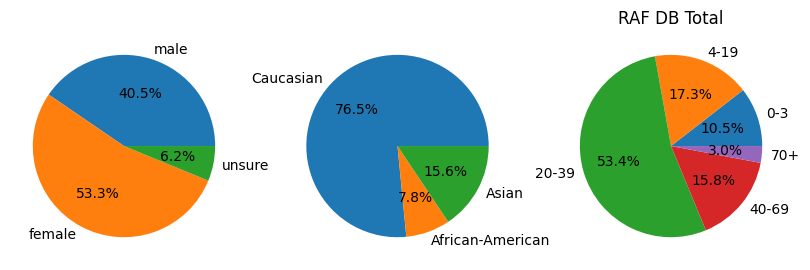

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].pie(total_gender, labels=["male", "female", "unsure"],autopct='%1.1f%%')
axs[1].pie(total_race, labels=["Caucasian", "African-American", "Asian"], autopct='%1.1f%%')
axs[2].pie(total_age, labels=["0-3", "4-19", "20-39", "40-69", "70+"], autopct='%1.1f%%')
plt.title("RAF DB Total")
plt.show()

In [ ]:
def AgeToCsv(age):
    if age == '0' or age == 0:
        return "0-3"
    elif age == '1' or age == 1:
        return "4-19"
    elif age == '2' or age == 2:
        return "20-39"
    elif age == '3' or age == 3:
        return "40-69"
    else:
        return "70+"


def writeInfoToCSV():
    rows = []
    for i in range(1, 3069):
        if i < 10:
            file = open(f'./manual/test_000{i}_manu_attri.txt', 'r')
            filename = f"test_000{i}_aligned"
        elif i < 100:
            filename = f"test_00{i}_aligned"
            file = open(f'./manual/test_00{i}_manu_attri.txt', 'r')
        elif i < 1000:
            filename = f"test_0{i}_aligned"
            file = open(f'./manual/test_0{i}_manu_attri.txt', 'r')
        else:
            filename = f"test_{i}_aligned"
            file = open(f'./manual/test_{i}_manu_attri.txt', 'r')

        content = file.readlines()
        rows.append([filename+".jpg", content[5].replace('0', 'male').replace('1','female').replace('2', 'unsure').replace("\n", ""), content[6].replace('0','Caucasian').replace("1","African-American").replace("2","Asian").replace("\n", ""), AgeToCsv(content[7].replace('\n', '').replace(" ","")), AgeToCsv(content[7].replace('\n', '').replace(" ","")), "test"])
        gender.append(content[5])
        race.append(content[6])
        age.append(content[7])


        gender_test_counter.append(content[5])
        race_test_counter.append(content[6])
        age_test_counter.append(content[7])
        test_gender = np.array([Counter(gender_test_counter)['0\n'], Counter(gender_test_counter)['1\n'], Counter(gender_test_counter)['2\n']])
        test_race = np.array([Counter(race_test_counter)['0\n'], Counter(race_test_counter)['1\n'], Counter(race_test_counter)['2\n']])
        test_age = np.array([Counter(age_test_counter)['0\n'], Counter(age_test_counter)['1\n'], Counter(age_test_counter)['2\n']+1, Counter(age_test_counter)['3\n']+1, Counter(age_test_counter)['4\n']])

    for i in range(1, 12272):
        if i < 10:
            file = open(f'./manual/train_0000{i}_manu_attri.txt', 'r')
            filename = f"train_0000{i}_aligned"
        elif i < 100:
            file = open(f'./manual/train_000{i}_manu_attri.txt', 'r')
            filename = f"train_000{i}_aligned"
        elif i < 1000:
            file = open(f'./manual/train_00{i}_manu_attri.txt', 'r')
            filename = f"train_00{i}_aligned"
        elif i < 10000:
            file = open(f'./manual/train_0{i}_manu_attri.txt', 'r')
            filename = f"train_0{i}_aligned"
        else:
            file = open(f'./manual/train_{i}_manu_attri.txt', 'r')
            filename = f"train_{i}_aligned"
        content = file.readlines()
        rows.append([filename+".jpg", content[5].replace('0', 'male').replace('1','female').replace('2', 'unsure').replace("\n", ""), content[6].replace('0','Caucasian').replace("1","African-American").replace("2","Asian").replace("\n", ""), AgeToCsv(content[7].replace('\n', '').replace(" ","")), AgeToCsv(content[7].replace('\n', '').replace(" ","")), "train"])
        gender.append(content[5])
        race.append(content[6])
        age.append(content[7])

    filename = "rafdbcsv.csv"
    
    # writing to csv file
    with open(filename, 'w') as csvfile:
        # creating a csv writer object
        csvwriter = csv.writer(csvfile)
        
        # writing the fields
        csvwriter.writerow(["filename", "gender", "race", "age", "age_range", "split"])
        
        # writing the data rows
        csvwriter.writerows(rows)

FierFace Dataset

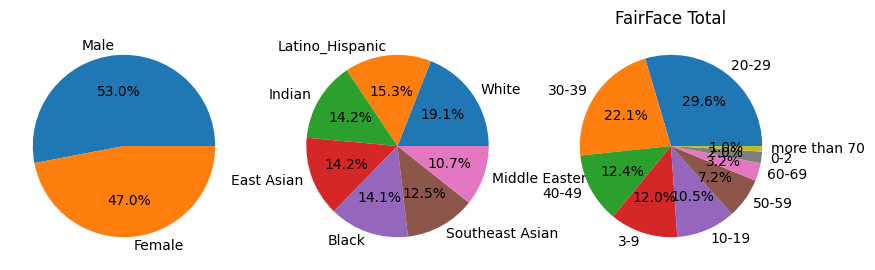

In [ ]:
# I calculated it on local machine

total_race = np.array([18612, 14990, 13835, 13837, 13789, 12210, 10425])
total_gender = np.array([51778, 45920])
total_age = np.array([28898, 21580, 12097, 11764, 10284, 7024, 3100, 1991, 960])


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].pie(total_gender, labels=["Male", "Female"],autopct='%1.1f%%')
axs[1].pie(total_race, labels=["White", "Latino_Hispanic", 'Indian', 'East Asian', 'Black', 'Southeast Asian', 'Middle Eastern'], autopct='%1.1f%%')
axs[2].pie(total_age, labels=['20-29', "30-39", "40-49", "3-9", "10-19", '50-59', '60-69', '0-2', 'more than 70'], autopct='%1.1f%%')
plt.title("FairFace Total")
plt.show()

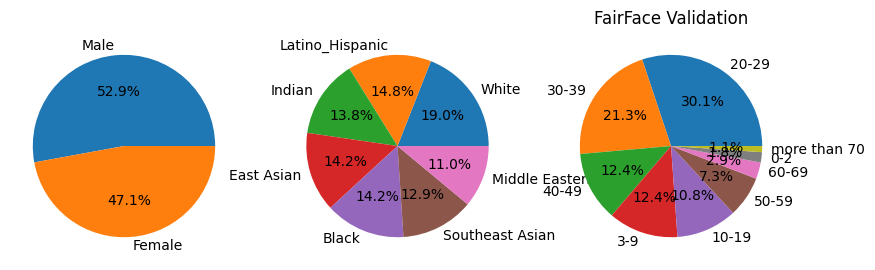

In [ ]:
race_val = np.array([2085, 1623, 1516, 1550, 1556, 1415, 1209])
gender_val = np.array([5792, 5162])
age_val = np.array([3300, 2330, 1353, 1356, 1181, 796, 321, 199, 118])


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].pie(gender_val, labels=["Male", "Female"],autopct='%1.1f%%')
axs[1].pie(race_val, labels=["White", "Latino_Hispanic", 'Indian', 'East Asian', 'Black', 'Southeast Asian', 'Middle Eastern'], autopct='%1.1f%%')
axs[2].pie(age_val, labels=['20-29', "30-39", "40-49", "3-9", "10-19", '50-59', '60-69', '0-2', 'more than 70'], autopct='%1.1f%%')
plt.title("FairFace Validation")
plt.show()